# Homework 3

## Pair Programming Group Number: 24
## Members of Team: Wenxuan Zhou

## Feature engineering and linear regression

For this week's homework we are going to load in a data set that isn't in the "cleanest", repair it, add a feature, do some analysis on the features, build a linear regression model, and use that model to estimate numeric values.  Is linear regression _really_ machine learning? Depends on who you ask, but it is definitely an important tool for data analytics. 

In [1]:
# only use these libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load in the melb_data_sold_train.csv file here
df = pd.read_csv('https://gist.githubusercontent.com/TieJean/797fc6b68b98dc93d9270c1d9b5759d5/raw/a2d467663d9320913ca4b3c52aa75bb20e42988e/melb_data_sold_train.csv/')
df.head()

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,85 Turner St,2,h,1480000.0,3/12/2016,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan
2,Abbotsford,129 Charles St,2,h,941000.0,7/05/2016,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan
3,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan
4,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan


## Q1 Fix the dataframe to remove any blanks
The linear regression needs all attribute and dependent values to be defined.  Use list-wise deletion to remove entries with missing values. Save the modified dataframe with the indices reset to be $0-(length-1)$ into the variable `df1` for use in a later problem. 

In [2]:
df1 = df.dropna().reset_index()
df1.head()

,index,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan
1,3,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan
2,4,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan
3,6,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan
4,7,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.8078,144.9965,Northern Metropolitan


## Q2 Add a new feature
Toorak is known as one of the priciest suburbs in Melbourne.  Create a new column in your dataframe that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.  Use the latitude / longitude of $(-37.841820, 145.015986)$ for the center of Toorak.  You may assume the Earth is spherical and has radius of $6371.0088$km (check your function ... the property located at $(-37.68178,144.73779)$ is approx 30.2 km away)

In [3]:
# Step 1 : Define the Haversine distance as a function
# assumes that pt1 and pt2 are 2x1 [lat,long] np arrays that contain locations of the 2 earth coordinates in deg
# using the Haversine formula found https://en.wikipedia.org/wiki/Haversine_formula
def haversine_distance(pt1,pt2):
    lat1 = pt1[0] * np.pi/180
    lat2 = pt2[0] * np.pi/180
    lon1 = pt1[1] * np.pi/180
    lon2 = pt2[1] * np.pi/180
    dist = np.arccos(1 - ((np.sin((lat2 - lat1)/2))**2 + np.cos(lat1) * np.cos(lat2) * (np.sin((lon2 - lon1)/2))**2) * 2)
    return dist * 6371.0088

In [4]:
# A quick check to see if we are getting the expected value
toorak_pt = np.array([-37.841820, 145.015986])
haversine_distance(toorak_pt,[-37.68178,144.73779])


30.244772513599806

In [5]:
# Step 2 : Add a new column to `df1` called 'distance_to_toorak' that uses the haversine_distance function 
# to calculate the distance to Toorak for every row in our dataframe. Save the new dataframe as `df2`
df2 = df1.copy(deep=True)
df2['distance_to_toorak'] = haversine_distance(toorak_pt, np.array([df2['Lattitude'], df2['Longtitude']]))
df2.head()

,index,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4.261612
1,3,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4.621843
2,4,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4.374206
3,6,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4.780655
4,7,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.8078,144.9965,Northern Metropolitan,4.152012


## Q3 Create a one hot encoding for the categorical column 'Type'
Modify the data frame `df2` such that it removes the column for `Type` and replaces it with the appropriate number of columns for a one-hot encoding of the column `Type` and save that dataframe as `df3` for use in a later problem. The pandas method [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) will be very useful here. 

In [6]:
temp = pd.get_dummies(df2['Type'])
index = df2.columns.get_loc('Type')
df3 = df2.drop('Type', axis = 1)

for i in range(len(temp.columns)):
    df3.insert(index + i, temp.columns[i], temp[temp.columns[i]])
    
df3.head()

,index,Suburb,Address,Rooms,h,t,u,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,1,Abbotsford,25 Bloomburg St,2,1,0,0,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4.261612
1,3,Abbotsford,124 Yarra St,3,1,0,0,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4.621843
2,4,Abbotsford,98 Charles St,2,1,0,0,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4.374206
3,6,Abbotsford,10 Valiant St,2,1,0,0,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4.780655
4,7,Abbotsford,123/56 Nicholson St,2,0,0,1,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.8078,144.9965,Northern Metropolitan,4.152012


## Q4 Calculate the pairwise correlations between all of your numeric attributes
Use the Pearson correlation as discussed in the lectures to calculate the pairwise correlations between the attributes in the dataframe `df3`. Read the documentation for [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [7]:
df3.corr(method="pearson")

,index,Rooms,h,t,u,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak
index,1.000000,0.041668,0.016705,0.009308,-0.025499,-0.156108,0.063008,0.064716,0.013282,0.077934,0.073302,-0.021849,0.155483,0.086635,0.035259,0.359392
Rooms,0.041668,1.000000,0.501128,-0.040762,-0.535102,0.502814,0.054676,0.941684,0.593847,0.401716,0.085676,0.547816,-0.030447,0.012858,0.074846,0.232844
h,0.016705,0.501128,1.000000,-0.484749,-0.778062,0.391761,-0.040504,0.484612,0.181773,0.214175,0.047422,0.306231,-0.402670,0.121254,-0.040387,0.221104
t,0.009308,-0.040762,-0.484749,1.000000,-0.172282,-0.095295,-0.008546,-0.037366,0.108148,-0.006836,-0.067257,-0.032396,0.331105,-0.028636,0.023603,-0.014192
u,-0.025499,-0.535102,-0.778062,-0.172282,1.000000,-0.372766,0.051754,-0.518941,-0.282390,-0.236298,-0.005103,-0.321614,0.215689,-0.115991,0.028533,-0.238818
Price,-0.156108,0.502814,0.391761,-0.095295,-0.372766,1.000000,0.136468,0.480115,0.462985,0.223552,0.064029,0.465598,-0.330560,-0.224400,0.184597,-0.357013
Postcode,0.063008,0.054676,-0.040504,-0.008546,0.051754,0.136468,1.000000,0.059311,0.122046,0.034698,0.014276,0.089355,0.035561,-0.445625,0.471934,0.008062
Bedroom2,0.064716,0.941684,0.484612,-0.037366,-0.518941,0.480115,0.059311,1.000000,0.594920,0.403840,0.083237,0.532910,-0.010031,0.019970,0.076236,0.241515
Bathroom,0.013282,0.593847,0.181773,0.108148,-0.282390,0.462985,0.122046,0.594920,1.000000,0.322266,0.059483,0.470554,0.192470,-0.068643,0.109313,0.051662
Car,0.077934,0.401716,0.214175,-0.006836,-0.236298,0.223552,0.034698,0.403840,0.322266,1.000000,0.100686,0.299613,0.153313,-0.007839,0.032915,0.214759


## Q5 Create a linear regression model to predict home values
Using the math in ESLII, section 3.2 equation (3.6) calculate $\hat{\beta}$

We are going to create a linear regression model using our numeric attribute columns in `df3`, and specifying the home values (`Price` column) as the value we are trying to predict.  You may use numpy to do matrix calculations, but you may not use a built in regression library (for example, you may not use scikt-learn). 

The features you use to build the matrix $X$ should all be numeric and include the distance to Toorak and the one hot encodings. 

In [8]:
# Step one, build the matrix X
attributes = ['Rooms', 'h', 't', 'u','Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'distance_to_toorak']
X = df3.loc[:, attributes]
X.insert(0,"intercept",1)
X

,intercept,Rooms,h,t,u,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,distance_to_toorak
0,1,2,1,0,0,2.0,1.0,0.0,156.0,79.0,1900.0,4.261612
1,1,3,1,0,0,4.0,2.0,0.0,245.0,210.0,1910.0,4.621843
2,1,2,1,0,0,2.0,1.0,2.0,256.0,107.0,1890.0,4.374206
3,1,2,1,0,0,3.0,1.0,2.0,220.0,75.0,1900.0,4.780655
4,1,2,0,0,1,2.0,2.0,1.0,0.0,94.0,2009.0,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1,3,1,0,0,3.0,1.0,1.0,422.0,104.0,1960.0,16.998846
3906,1,4,1,0,0,4.0,3.0,1.0,807.0,190.0,1975.0,18.491623
3907,1,3,0,1,0,3.0,1.0,2.0,269.0,125.0,2000.0,11.798784
3908,1,4,0,1,0,4.0,2.0,2.0,304.0,183.0,2007.0,11.986684


In [9]:
# Step two, build the column vector y
y = df3.loc[:, ['Price']]
y

,Price
0,1035000.0
1,1876000.0
2,1636000.0
3,1097000.0
4,750000.0
...,...
3905,680000.0
3906,900000.0
3907,1200000.0
3908,1200000.0


In [10]:
# Step three, find beta hat per the formula (3.6) (you should use the library we used in class)
(beta_hat, residuals, rank, s) = np.linalg.lstsq(X, y, rcond=-1)
beta_hat

array([[ 5.14208294e+06],
       [ 1.38292418e+05],
       [ 1.87304175e+06],
       [ 1.69617927e+06],
       [ 1.57286192e+06],
       [ 2.42147864e+04],
       [ 2.17357677e+05],
       [ 5.68813256e+04],
       [ 1.89947872e+01],
       [ 1.27978023e+03],
       [-3.28186078e+03],
       [-4.42348260e+04]])

In [11]:
# Test the model to see if we get something "reasonable" - i picked 23 at random 
np.matmul(X.iloc[23],beta_hat) 

array([714401.03174757])

In [12]:
# This is the actual price at this point
y.iloc[23]

Price    805000.0
Name: 23, dtype: float64

## Q6 Apply the linear regression model to the test data and visualize the error
We will cover other methods of evaluating any sort of prediction later, but for this week's exercise I have partitioned the data into two files.  Load the melb_data_sold_test.csv data set and use the $\hat{\beta}$ you calculated in the last step to predict the housing prices for data in melb_data_sold_test.  Create a visualization that shows the absolute error in your predictions. Remember to do all your data pre-processing on the data loaded from the melb_data_sold_test file before you apply beta_hat.  For the visualization, a histogram of the absolute error vs the total housing prices is sufficient.  Use [hist](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) for reference. 

While doing imputation, there are some helpful parameters in [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). 

In [13]:
# Step zero, load the melb_data_sold_test.csv data for testing.  Use Imputation to fill in any missing numeric values
# We use imputation here instead of deletion since we want a prediction for _every_ row in the test file.
df_test = pd.read_csv('https://gist.githubusercontent.com/TieJean/e17178b1ffcb594dbf2232de90f8bb1f/raw/17c751b38a159b246321100188f35fa7cfb6c0b9/melb_data_sold_test.csv')

for i in df_test.select_dtypes(include=np.number).columns:
    df_test[i] = df_test[i].fillna(value=df_test[i].mean())

df_test.head()

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Jacana,29 Fox Ct,3,h,620500.0,29/07/2017,3047.0,3.0,1.0,4.0,764.0,244.154731,1968.796396,Hume,-37.68907,144.91459,Northern Metropolitan
1,Keilor Park,45 Collinson St,3,h,750000.0,29/07/2017,3042.0,3.0,2.0,2.0,761.0,222.000000,1980.000000,Brimbank,-37.72224,144.85739,Western Metropolitan
2,Kensington,42 Gower St,3,h,1060000.0,29/07/2017,3031.0,3.0,1.0,0.0,190.0,244.154731,1968.796396,Melbourne,-37.79560,144.92779,Northern Metropolitan
3,Kew,6/385 Barkers Rd,3,t,1405000.0,29/07/2017,3101.0,3.0,2.0,2.0,325.0,129.000000,1980.000000,Boroondara,-37.81614,145.05056,Southern Metropolitan
4,Kew,11 Raheen Dr,4,h,3015000.0,29/07/2017,3101.0,4.0,2.0,2.0,813.0,276.000000,1970.000000,Boroondara,-37.80437,145.01725,Southern Metropolitan


In [14]:
# Step one, add the new attribute for the 'distance_to_toorak' and the one hot encoding to the new data frame
df_test['distance_to_toorak'] = haversine_distance(toorak_pt, np.array([df_test['Lattitude'], df_test['Longtitude']]))
df_test.head()

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Jacana,29 Fox Ct,3,h,620500.0,29/07/2017,3047.0,3.0,1.0,4.0,764.0,244.154731,1968.796396,Hume,-37.68907,144.91459,Northern Metropolitan,19.181567
1,Keilor Park,45 Collinson St,3,h,750000.0,29/07/2017,3042.0,3.0,2.0,2.0,761.0,222.000000,1980.000000,Brimbank,-37.72224,144.85739,Western Metropolitan,19.263068
2,Kensington,42 Gower St,3,h,1060000.0,29/07/2017,3031.0,3.0,1.0,0.0,190.0,244.154731,1968.796396,Melbourne,-37.79560,144.92779,Northern Metropolitan,9.296810
3,Kew,6/385 Barkers Rd,3,t,1405000.0,29/07/2017,3101.0,3.0,2.0,2.0,325.0,129.000000,1980.000000,Boroondara,-37.81614,145.05056,Southern Metropolitan,4.168250
4,Kew,11 Raheen Dr,4,h,3015000.0,29/07/2017,3101.0,4.0,2.0,2.0,813.0,276.000000,1970.000000,Boroondara,-37.80437,145.01725,Southern Metropolitan,4.165735


In [15]:
temp = pd.get_dummies(df_test['Type'])
index = df_test.columns.get_loc('Type')
df_test = df_test.drop('Type', axis = 1)

for i in range(len(temp.columns)):
    df_test.insert(index + i, temp.columns[i], temp[temp.columns[i]])
    
df_test.head()

,Suburb,Address,Rooms,h,t,u,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Jacana,29 Fox Ct,3,1,0,0,620500.0,29/07/2017,3047.0,3.0,1.0,4.0,764.0,244.154731,1968.796396,Hume,-37.68907,144.91459,Northern Metropolitan,19.181567
1,Keilor Park,45 Collinson St,3,1,0,0,750000.0,29/07/2017,3042.0,3.0,2.0,2.0,761.0,222.000000,1980.000000,Brimbank,-37.72224,144.85739,Western Metropolitan,19.263068
2,Kensington,42 Gower St,3,1,0,0,1060000.0,29/07/2017,3031.0,3.0,1.0,0.0,190.0,244.154731,1968.796396,Melbourne,-37.79560,144.92779,Northern Metropolitan,9.296810
3,Kew,6/385 Barkers Rd,3,0,1,0,1405000.0,29/07/2017,3101.0,3.0,2.0,2.0,325.0,129.000000,1980.000000,Boroondara,-37.81614,145.05056,Southern Metropolitan,4.168250
4,Kew,11 Raheen Dr,4,1,0,0,3015000.0,29/07/2017,3101.0,4.0,2.0,2.0,813.0,276.000000,1970.000000,Boroondara,-37.80437,145.01725,Southern Metropolitan,4.165735


In [16]:
# Step two, build the attribute matrix Xdot 
Xdot = df_test.loc[:, attributes]
Xdot.insert(0,"intercept",1)
Xdot

,intercept,Rooms,h,t,u,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,distance_to_toorak
0,1,3,1,0,0,3.0,1.0,4.0,764.0,244.154731,1968.796396,19.181567
1,1,3,1,0,0,3.0,2.0,2.0,761.0,222.000000,1980.000000,19.263068
2,1,3,1,0,0,3.0,1.0,0.0,190.0,244.154731,1968.796396,9.296810
3,1,3,0,1,0,3.0,2.0,2.0,325.0,129.000000,1980.000000,4.168250
4,1,4,1,0,0,4.0,2.0,2.0,813.0,276.000000,1970.000000,4.165735
...,...,...,...,...,...,...,...,...,...,...,...,...
1016,1,4,1,0,0,4.0,2.0,2.0,717.0,191.000000,1980.000000,18.262739
1017,1,4,1,0,0,4.0,2.0,1.0,662.0,172.000000,1980.000000,32.814349
1018,1,3,1,0,0,3.0,2.0,2.0,256.0,244.154731,1968.796396,21.030518
1019,1,4,1,0,0,4.0,2.0,2.0,652.0,244.154731,1981.000000,15.081333


In [17]:
# Step three, multiply Xdot by Beta hat. DO NOT USE A LOOP.  This is a vector of predicted prices
# called y_hat in the notes
y_hat = np.matmul(Xdot.to_numpy(), beta_hat)
y_hat

array([[ 964696.73685427],
       [ 999507.72709163],
       [1163518.92347082],
       ...,
       [ 976854.37613379],
       [1369994.1494236 ],
       [1429366.449104  ]])

In [18]:
# Step four, calculate the error vector, |actual price - predicted price|. We call this our "absolute error"
absolute_error = np.abs(df_test['Price'].to_numpy().reshape(y_hat.shape) - y_hat)
absolute_error

array([[344196.73685427],
       [249507.72709163],
       [103518.92347082],
       ...,
       [394854.37613379],
       [124994.1494236 ],
       [259366.449104  ]])

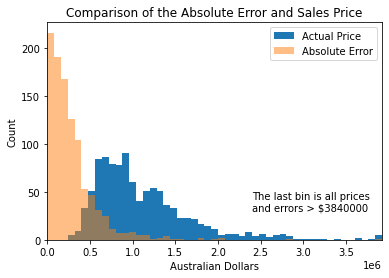

In [27]:
# Step five, create a histogram of the absolute error, and on the same plot create a histogram of the actual price.  
# You should use the "alpha" parameter to make the graph on top slightly translucent 
bins = []
for i in range(49):
    bins.append(i * 80000)
bins.append(df_test['Price'].max() + 1)
plt.hist(df_test['Price'], bins = bins)
plt.hist(absolute_error, alpha=0.5, bins = bins)
plt.xlabel("Australian Dollars")
plt.ylabel("Count")
plt.title("Comparison of the Absolute Error and Sales Price")
plt.legend(["Actual Price", "Absolute Error"])
plt.xlim([0,80000*49])
plt.annotate("The last bin is all prices \nand errors > $3840000", (2400000, 30))
plt.show()